# Cognitive memory

A cognitive memory can recall patterns, like images or word, previously stored similar to a new pattern that is submitted. A valuable instrument to implements a cognitive memory is a neural network, a network made up of connected computational elements called neurons that compute "collectively". A set of patterns is stored in a network and when a new pattern is fed to the network it tries to find a pattern among the stored that resembles the new one. The interested reader may find in [1] and [2] a more satisfying introduction to neural network.


A Hopfield network will be used in this specific case. In this model we can regard the neurons as two values variables, and we will label the $i$-th neuron as $ s_i = \pm 1 $. The networks learning process is unsupervised, this means that will not be given examples from witch the networks learns, instead a concept of "energy" of patterns will soon be introduced such that the energy minimum, in which the network fall, will be the desired pattern!

Labeling $J_{ij}$ the interaction between two neurons which are taken to be symmetrical, in formula $ J_{ij}=J_{ji} $ , we define the energy of a pattern labeled $m$ as

$ E = - \sum J_{ij} s_i(m) s_j(m) $.

If the network is bi-dimensional with $N$ neurons per side, the $J_{ij}$ can be regarded as a four-dimensional matrix $N \times N  \times N \times N $.

If for a start we want to store a single pattern, a way to define the $J_{ij}$ is as follows

$ J_{ij}=s_i(m)s_j(m) $.

This way, whatever the values of the neurons, the energy is just minus a sum of positive terms for the stored pattern, hence it is a minimum.

To make the network fall in the minimum energy configuration a Monte-Carlo simulation is implemented. Given a network configuration, a try is made to switch a neuron. If the energy increase the move is rejected and this goes on until we try to switch every neuron. The above procedure, known as a Monte-Carlo step is repeated until the networks reach the desired pattern. Later on, the chance of defining a "temperature" of the system will be discussed, but now is time to implement a cognitive memory with the python programming language! 

A pattern is defined, which resembles the S letter, as a two dimensional matrix. Then the $J_{ij}$  are defined as a four dimensional matrix and the values are filled with a nested cycle. Then a new pattern is generated randomly changing the elements of the S pattern. To develop an interactive program the Jupyter notebook has been used, the reader may find here all the necessary information about the Jupyter project http://jupyter.org/. In this case, the probability with which the $i-j$-th element of the pattern is switched in order to generate the randomly modified pattern can be interactively choose and the network will recall the stored pattern.

This?


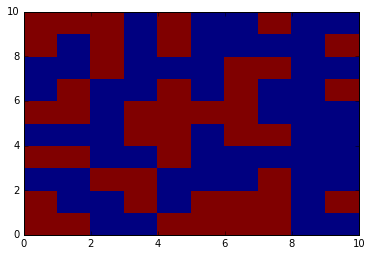

Reminds me this!


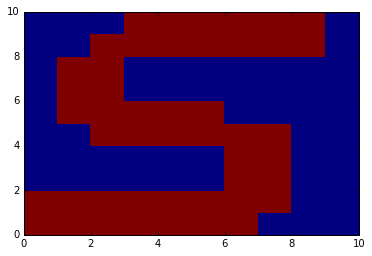

In [12]:
import numpy as np                 #Import library for scientific computation
import matplotlib.pyplot as mpl    #Import library for plots
from ipywidgets import *           #Import library for interacting widgets
#Tell python to show plots inside the notebook
%matplotlib inline 

#The desired pattern is stored
S = [
   [-1, -1, -1, 1, 1, 1, 1, 1, 1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, 1, -1],
   [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
   [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
   [-1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
   [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
   [1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, 1, 1, 1, 1, 1, 1, -1, -1, -1]
   ];


S = np.flipud(S)  #Transpose the matrix so to have the S letter when plotted


J = np.zeros((10,10,10,10))    #Define a four dimension matrix for the J_{i}

#Fill the values with a nested cycle

for k in range(10):
    for l in range(10):
        for m in range(10):
            for n in range(10):
                J[k,l,m,n] = S[k,l]*S[m,n]
                

#A function that computes the energy of a pattern is defined
                
def H(A):  
    
    """Given a configuration of neurons A, the funtions returns the energy H associated with that configuration
    """
    
    H = 0
    for k in range(10):
        for l in range(10):
             for m in range(10):
                for n in range(10):
                    H = H + (-J[k,l,m,n]*A[k,l]*A[m,n])
    return H 




simil_S = np.zeros((10,10))             #A copy of S is defined
np.copyto(simil_S,S)


#The main function is defined

def simple_memory(prob, max_cycles):
    
    """The arguments are the probability with witch an element of the copy of S are switched and the maximum number of
       Monte-Carlo steps to be executed (this way the program should not end in a infinite loop!).
       Both the modified S pattern and the recolled pattern are plotted.    
    """

    #The copy of S is modified. Any element can be swithced with probability "prob"
    
    for i in range(10):
        for j in range(10):

            if np.random.randint(10) > prob:
                simil_S[i,j] = -simil_S[i,j]

    #Print S
    
    print("This?")
    mpl.figure()
    mpl.pcolor(simil_S)
    mpl.show()
    mpl.close()
    print("Reminds me this!")

    
    #Implement Monte-Carlo method
    
    for t in range(max_cycles):
        for i in range(10):
            for j in range(10):
                H_i = H(simil_S)                 #The H of the confiuration is computed
                simil_S[i,j] = -simil_S[i,j]     #The switch is tried
                H_f = H(simil_S)                 #The new H is computed
                if H_f > H_i:                    #The switch is rejected or confirmed 
                    simil_S[i,j] = -simil_S[i,j]
        
        if (simil_S == S).all:                   #If the configuration becames equal to the stored pattern, breaks the cycle
            break
            
    #Print the pattern recalled
    
    mpl.figure()
    mpl.pcolor(simil_S)
    mpl.show()
    mpl.close()

#Call the the main function interactively
    
interact(simple_memory, prob = (0, 10, 1), max_cycles = (1, 10, 1) );

The network has fallen in love. Any pattern we submit will recall the S pattern or S opposite!

To make the memory useful at all, more patterns need to be stored. A way to redefine the $J_{ij}$ when $M$ patterns are given to  is as follow

$ J_{ij} = \frac{1}{M} \sum\limits_M s_i(m)s_j(m) $,

But how many patterns can be stored? The question can be answered using statistical mechanics. Indeed, the fact that this model can be resolved analytically was one of is major factor of success. The results are that the more patterns are stored the more minima the energy has and also spurious minima, combinations of various pattern will appear. It is thus possible for the network to fall in the wrong minimum, or to be stucked in a wrong minimum. To obviate the problem, a temperature for the system is defined, and in the Monte-Carlo cycle, when the energy diminishes of $\Delta H$ the moves is rejected with probability destribution $e^{-\frac{\Delta H}{T}}$ (which satisfies detailed balance).
If patterns are generated stochastically, which however is not our case, it can be obtained a phase diagram that shows quantitatively when the network is efficient [1]. In general, no more than $0.13N$ can be stored, where $N$ is the number of neurons.

A cognitive memory with many patterns is now implemented, so that the efficiency of the network may be tested with interaction.

This


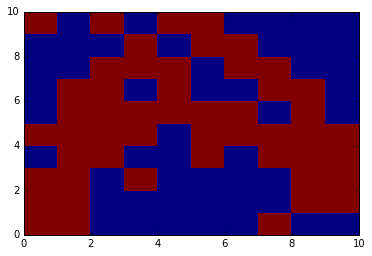

Reminds me this!


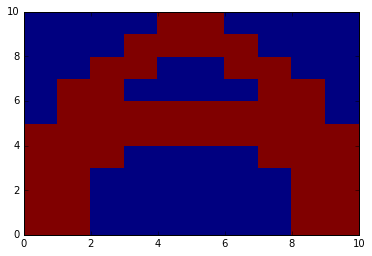

In [19]:
import numpy as np
import matplotlib.pyplot as mpl
from ipywidgets import *
%matplotlib inline

#The desired patterns are stored

S = [
   [-1, -1, -1, 1, 1, 1, 1, 1, 1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, 1, -1],
   [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
   [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
   [-1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
   [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
   [1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, 1, 1, 1, 1, 1, 1, -1, -1, -1]
   ];

S = np.flipud(S)

A = [
    [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1],
    [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1],
    [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1],
    [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1],
    [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
   ];

A = np.flipud(A)

R = [
    [-1, -1, 1, 1, 1, 1, 1, -1, -1, -1],
    [-1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
    [1, 1, 1, -1, -1, -1, 1, 1, -1, -1],
    [1, 1, -1, -1, 1, 1, 1, 1, -1, -1],
    [1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
    [1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
    [1, 1, -1, -1, 1, 1, 1, -1, -1, -1],
    [1, 1, -1, -1, -1, -1, 1, 1, -1, -1],
    [1, 1, -1, -1, -1, -1, 1, 1, -1, -1],
    [1, 1, -1, -1, -1, -1, 1, 1, -1, -1]
   ];

R = np.flipud(R)

H = [
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
   ];

H = np.flipud(H)

#The J_{}ij are defined

J = np.zeros((10,10,10,10))

for k in range(10):
    for l in range(10):
        for m in range(10):
            for n in range(10):               
                J[k,l,m,n] = 1/4 * ( S[k,l]*S[m,n] + A[k,l]*A[m,n] + R[k,l]*R[m,n] + H[k,l]*H[m,n] )
                

#A function that computes the energy of a pattern is defined. E is used because H is already used to label a pattern                
                
def E(pattern):
    
    """Given a configuration of neurons A, the funtions returns the energy H associated with that configuration
    """
    
    E = 0
    for k in range(10):
        for l in range(10):
            for m in range(10):
                for n in range(10):
                    E = E + (-J[k,l,m,n]*pattern[k,l]*pattern[m,n])
    return E  
                
"""
    The main funtion is defined, and this time it also depends on what pattern we start from to build the modified pattern
    and from the temperature value
"""

def memory(pattern, T, prob, max_cycles):
    
    """
        The arguments are: the pattern we start from to build the modified pattern, 
        the probability with witch an element of the copy
        of S are switched, and the maximum number of Monte-Carlo steps to be executed 
        (this way the program should not end in a infinite loop!). 
        Both the modified S pattern and the recolled pattern are plotted. 
    """
    
    #Define a matrix in which the modified pattern will be stored
    
    simil_pattern = np.zeros((10,10))
    
    #From the given values of the variable pattern, decide what pattern will be modified
    
    if pattern==1:  
        np.copyto(simil_pattern, S)
    elif pattern==2:
        np.copyto(simil_pattern, A)
    elif pattern==3:
        np.copyto(simil_pattern, R)
    elif pattern==4:
        np.copyto(simil_pattern, H)      

    #modify the pattern
    
    for i in range(10):
            for j in range(10):

                if np.random.randint(10) > prob:
                    simil_pattern[i,j] = -simil_pattern[i,j]

    #Print the modified pattern
    
    print("This")
    mpl.figure()
    mpl.pcolor(simil_pattern)
    mpl.show()
    mpl.close()
    print("Reminds me this!")

    #Implement the Monte-Carlo cycle
    
    for t in range(max_cycles):
        for i in range(10):
            for j in range(10):
                E_i = E(simil_pattern)
                simil_pattern[i,j] = -simil_pattern[i,j]
                E_f = E(simil_pattern)
                if E_f >= E_i:
                    simil_pattern[i,j] = -simil_pattern[i,j]
                elif E_f < E_i and T!=0:                        #With the addition of the temperature
                    DE = E_f-E_i
                    if np.exp(-1/T*DE) < np.random.rand(1, 1):
                        simil_pattern[i,j] = -simil_pattern[i,j]            

    #Print the recalled pattern 

    mpl.figure()
    mpl.pcolor(simil_pattern)
    mpl.show()
    mpl.close()

#Call the the main function interactively

interact(memory, pattern=(1, 4, 1), T = (0, 1, 0.1), prob = (0, 10, 1), max_cycles = (1, 10, 1) );

This are just four pattern and the memory works good. However the more the patterns stored the more the "errors" of the network!

This?


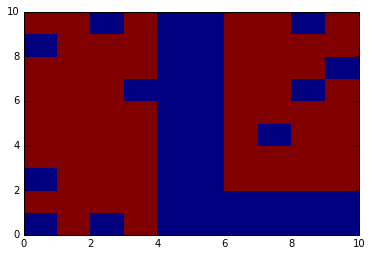

Remind me this!


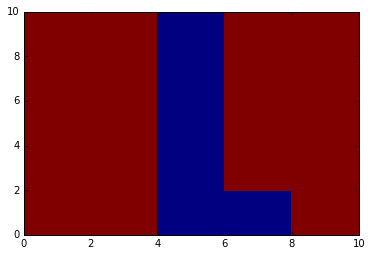

In [21]:
import numpy as np
import matplotlib.pyplot as mpl
from ipywidgets import *
%matplotlib inline


I = [
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1]
   ];

I = np.flipud(I)


L = [
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, -1, -1, -1, -1],
   [1, 1, 1, 1, -1, -1, -1, -1, -1, -1]
   ];

L = np.flipud(L)


V = [
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, -1, -1, 1, 1, 1, 1, -1, -1, 1],
   [1, -1, -1, 1, 1, 1, 1, -1, -1, 1],
   [1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
   [1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
   [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
   [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
   ];

V = np.flipud(V)


Y = [
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, -1, -1, 1, 1, 1, 1, -1, -1, 1],
   [1, -1, -1, 1, 1, 1, 1, -1, -1, 1],
   [1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
   [1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
   [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
   [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1]
   ];

Y = np.flipud(Y)


O = [
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1],
   [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
   [1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
   [1, -1, -1, 1, 1, 1, 1, -1, -1, 1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, -1, -1, 1, 1, 1, 1, -1, -1, 1],
   [1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
   [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1]
   ];

O = np.flipud(O)


U = [
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, -1, -1, 1, 1, 1, 1, -1, -1, 1],
   [1, 1, -1, -1, 1, 1, -1, -1, 1, 1],
   [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
   [1, 1, 1, 1, -1, -1, 1, 1, 1, 1]
   ];

U = np.flipud(U)


S = [
   [-1, -1, -1, 1, 1, 1, 1, 1, 1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, 1, -1],
   [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
   [-1, 1, 1, -1, -1, -1, -1, -1, -1, -1],
   [-1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
   [-1, -1, 1, 1, 1, 1, 1, 1, -1, -1],
   [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
   [-1, -1, -1, -1, -1, -1, 1, 1, -1, -1],
   [1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
   [1, 1, 1, 1, 1, 1, 1, -1, -1, -1]
   ];

S = np.flipud(S)


A = [
    [-1, -1, -1, -1, 1, 1, -1, -1, -1, -1],
    [-1, -1, -1, 1, 1, 1, 1, -1, -1, -1],
    [-1, -1, 1, 1, -1, -1, 1, 1, -1, -1],
    [-1, 1, 1, -1, -1, -1, -1, 1, 1, -1],
    [-1, 1, 1, 1, 1, 1, 1, 1, 1, -1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, -1, -1, -1, -1, 1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
   ];

A = np.flipud(A)


R = [
    [-1, -1, 1, 1, 1, 1, 1, -1, -1, -1],
    [-1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
    [1, 1, 1, -1, -1, -1, 1, 1, -1, -1],
    [1, 1, -1, -1, 1, 1, 1, 1, -1, -1],
    [1, 1, 1, 1, 1, 1, 1, 1, -1, -1],
    [1, 1, 1, 1, 1, 1, -1, -1, -1, -1],
    [1, 1, -1, -1, 1, 1, 1, -1, -1, -1],
    [1, 1, -1, -1, -1, -1, 1, 1, -1, -1],
    [1, 1, -1, -1, -1, -1, 1, 1, -1, -1],
    [1, 1, -1, -1, -1, -1, 1, 1, -1, -1]
   ];

R = np.flipud(R)


H = [
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1],
    [1, 1, -1, -1, -1, -1, -1, -1, 1, 1]
   ];

H = np.flipud(H)

J = np.zeros((10,10,10,10))

for k in range(10):
    for l in range(10):
        for m in range(10):
            for n in range(10):
                
                J[k,l,m,n] = 1/7 * ( S[k,l]*S[m,n] + A[k,l]*A[m,n] + R[k,l]*R[m,n] + H[k,l]*H[m,n] +
                                    V[k,l]*V[m,n] + I[k,l]*I[m,n] + L[k,l]*L[m,n] )
                
def E(pattern):
    E = 0
    for k in range(10):
        for l in range(10):
            for m in range(10):
                for n in range(10):
                    E = E + (-J[k,l,m,n]*pattern[k,l]*pattern[m,n])
    return E
         
def memory(pattern, T, prob, max_cycles):
                
    simil_pattern = np.zeros((10,10))
    
    if pattern == 1:
        np.copyto(simil_pattern, I)
    elif pattern == 2:
        np.copyto(simil_pattern, L)
    elif pattern == 3:
        np.copyto(simil_pattern, A)
    elif pattern == 4:
        np.copyto(simil_pattern, V)
    elif pattern == 5:
        np.copyto(simil_pattern, Y)
    elif pattern == 6:
        np.copyto(simil_pattern, O)
    elif pattern == 7:
        np.copyto(simil_pattern, U) 
    elif pattern == 8:
        np.copyto(simil_pattern, S)
    elif pattern == 9:
        np.copyto(simil_pattern, R)
    elif pattern == 10:
        np.copyto(simil_pattern, H)      

    for i in range(10):
            for j in range(10):
                if np.random.randint(10) > prob:
                    simil_pattern[i,j] = -simil_pattern[i,j]

    print("This?")
    mpl.figure()
    mpl.pcolor(simil_pattern)
    mpl.show()
    mpl.close()
    print("Remind me this!")

    for t in range(max_cycles):
        for i in range(10):
            for j in range(10):
                E_i = E(simil_pattern)
                simil_pattern[i,j] = -simil_pattern[i,j]
                E_f = E(simil_pattern)
                if E_f >= E_i:
                    simil_pattern[i,j] = -simil_pattern[i,j]
                elif E_f < E_i and T!=0:
                    DE = E_f-E_i
                    if np.exp(-1/T*DE) < np.random.rand(1, 1):
                        simil_pattern[i,j] = -simil_pattern[i,j]            

    mpl.figure()
    mpl.pcolor(simil_pattern)
    mpl.show()
    mpl.close()

interact(memory, pattern=(1, 10, 1), T = (0, 1, 0.1), prob = (0, 10, 1), max_cycles = (1, 10, 1) );

## Bibliography 

[1] Introduction to the theory of neural computations of Hertz, Krogh and Palmer.

[2] Computational physics of Giordano.
